In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [2]:
#import all the files needed
df_vehicle_re = pd.read_csv('../../../data/raw/mv1.csv')
df_MSA_DVMT = pd.read_csv('../../../data/raw/Miles-and-DVMT-by-County-and-Functional-Class-2022.csv')#this generate lsit, list has no following function but have to convert it to dataframe
df_population = pd.read_excel('../../../data/raw/ACSDP5Y2021.DP05-2023-09-11T201858.xlsx', sheet_name='Data')

In [3]:
#1. the number of statewide vehicle and its distributions
statewide_vehicle=df_vehicle_re.iloc[14,:]
rows = []

#int(statewide_vehicle.translate(str.maketrans('','',string.punctuation)))
# using for loop to append values in rows
for i in [3,6,9,12,15]:   

    #if (i % ) != 0:
        j=statewide_vehicle[i]
        j=int(j.translate(str.maketrans('','',string.punctuation)))

        #j=str(j)
        rows.append(j)

        
# converting the list into DataFrame
df_vehicle = pd.DataFrame(rows, columns=["Statewide number of vehicles"]) 
df_vehicle.index =["Automobiles"," Buses", "Trucks", "Motorcycle", "All Motor Vehicles"]

#ratio of each statewide vehicle to that of total
ra=0
rows = []
def ratio(local, state):
    return round(local/state,5)
    
for i in range(0,5):
    ra=ratio(df_vehicle.iloc[i,0],df_vehicle.iloc[4,0])
    rows.append(ra)
    
#add a list directly to the dataframe
df_vehicle['Each types relative to the total'] = rows


#swapping the rows of buses and trucks
# Strip leading and trailing whitespace from row labels
df_vehicle.index = df_vehicle.index.str.strip()

# Swap the indices and rows
df_vehicle = df_vehicle.reindex(["Automobiles", "Trucks", "Buses", "Motorcycle", "All Motor Vehicles"])

# Display the updated DataFrame
df_vehicle
df_vehicle.to_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/vehicle-number-distribution.csv')

df_vehicle

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23080\408193047.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  j=statewide_vehicle[i]


,Statewide number of vehicles,Each types relative to the total
Automobiles,1119278,0.40605
Trucks,1543765,0.56005
Buses,10222,0.00371
Motorcycle,83220,0.03019
All Motor Vehicles,2756485,1.00000


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


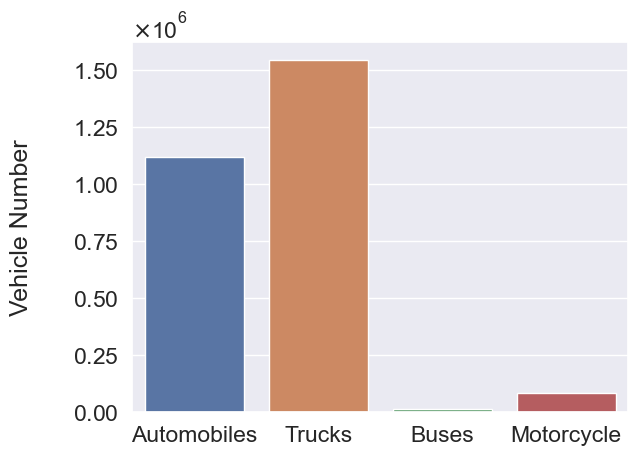

In [8]:
data = [['Automobiles', 1119278], ['Trucks', 1543765], ['Buses', 10222],['Motorcycle', 83220]]
df_vehicle_0 = pd.DataFrame(data, columns=['Vehicle Types', 'Number of Vehicles'])

g1=sns.barplot(data=df_vehicle_0, x="Vehicle Types", y="Number of Vehicles")
sns.set(font_scale=1.5)
g1.set(ylabel="Vehicle Number")
g1.yaxis.set_label_coords(-0.2, 0.5) 
g1.set_xlabel(None)
#g1.set_xticklabels(g1.get_xticklabels(),rotation=0, fontsize=12)
g1.xaxis.labelpad = 15  # Adjust the padding value as needed
g1.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
g1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))#formatting the y-axis large number


# Show the plot
#plt.show()
plt.savefig('../../../figures/vehicle-number-distribution.png', dpi=600,bbox_inches='tight')

In [9]:
df_MSA_DVMT_0=df_MSA_DVMT.iloc[0:10,16]
df_MSA_DVMT_1=df_MSA_DVMT.iloc[1:10,16]

df_MSA_DVMT_1=df_MSA_DVMT_1.to_frame()
# Renaming columns
df_MSA_DVMT_1.rename(columns={'Unnamed: 16': 'DVMT'}, inplace=True)

# Renaming index
df_MSA_DVMT_1.rename(index={0:'County', 1:'Fairfield', 2:'Hartford', 3:'Litchfield', 4:'Middlesex',
       5:'New Haven', 6:'New London', 7:'Tolland', 8:'Windham', 9: 'Total'}, inplace=True)
df_MSA_DVMT_1['MSA']=['Bridgeport-Stamford-Norwalk','Hartford-East Hartford-Middletown','Torrington','Hartford-East Hartford-Middletown','New Haven-Milford','Norwich-New London',
                    'Hartford-East Hartford-Middletown','Worcester','Statewide']
df_MSA_DVMT_1 = df_MSA_DVMT_1[['MSA', 'DVMT']].rename_axis(columns={'MSA': 'DVMT', 'DVMT': 'MSA'})#swap the columm while column index also swap
df_MSA_DVMT_1.to_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/DMV.csv')

# Remove commas and convert the column to numeric
df_MSA_DVMT_1['DVMT'] = df_MSA_DVMT_1['DVMT'].str.replace(',', '').astype(float)

# Convert the column to numeric
df_MSA_DVMT_1['DVMT (miles)'] = pd.to_numeric(df_MSA_DVMT_1['DVMT'], errors='coerce')
df_MSA_DVMT_1['VMT (billion miles)'] = df_MSA_DVMT_1['DVMT']*365/1000000000 #billion miles as the unit
df_MSA_DVMT_1
df_MSA_DVMT_1.to_csv('../../../data/tidy/vmt-dvmt.csv')

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


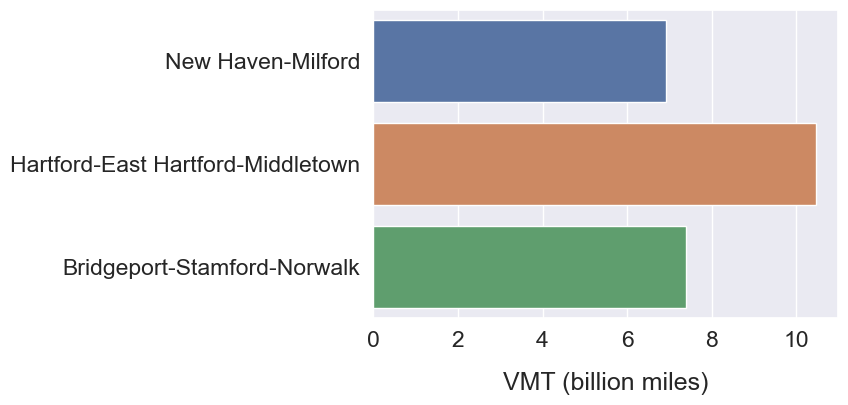

In [12]:
#remove the comma and convert the string to the int for all the data in that vmt list
rows=[]

for i in range(1,10):
    j=int(df_MSA_DVMT_0[i].translate(str.maketrans('','',string.punctuation)))
    rows.append(j)
    
#Calculate the total number of VMT in each MSAs
New_haven_msa_dvmt=rows[4]
Hartford_msa_dvmt=rows[1]+rows[3]+rows[6]
Bridgeport_msa_dvmt=rows[1]

#annual vmt

def vmt(dvmt):
    return dvmt*365

New_haven_msa_vmt=vmt(New_haven_msa_dvmt)
Hartford_msa_vmt=vmt(Hartford_msa_dvmt)
Bridgeport_msa_vmt=vmt(Bridgeport_msa_dvmt)

Total=New_haven_msa_vmt+Hartford_msa_vmt+Bridgeport_msa_vmt
New_haven_msa_re=round(New_haven_msa_vmt/Total*100,2)
Hartford_msa_re=round(Hartford_msa_vmt/Total*100,2)
Bridgeport_msa_re=round(Bridgeport_msa_vmt/Total*100,2)

data = [['New Haven-Milford', New_haven_msa_vmt/1000000000], ['Hartford-East Hartford-Middletown', Hartford_msa_vmt/1000000000], ['Bridgeport-Stamford-Norwalk', Bridgeport_msa_vmt/1000000000]]
df_vmt = pd.DataFrame(data, columns=['MSA', 'VMT(billion miles)'])
ratio = [New_haven_msa_re,Hartford_msa_re,Bridgeport_msa_re]

# set the size of the image
plt.figure(figsize=(6, 4)) 
#plot the MSA and vmt data
g1=sns.barplot(data=df_vmt, x="VMT(billion miles)", y="MSA")

#for i, row in enumerate(df_vmt.itertuples()):
    #plt.annotate(f' {ratio[i]}%',  # Text to display
                 #(row._2, i),  # Position of the text (x, y)
                 #textcoords="offset points",  # Offset text position
                 #xytext=(10, 0),  # Offset in points (tune this for better placement)
                 #ha='left')  # Horizontal alignment ('center' for centered text)
sns.set(font_scale=1.5)
g1.set(ylabel=None)
g1.set_xlabel("VMT (billion miles)")
#g1.set_xticklabels(g1.get_xticklabels(),rotation=0, fontsize=12)
g1.xaxis.labelpad = 15  # Adjust the padding value as needed
plt.savefig('../../../figures/VMT-MSA.png', dpi=600,bbox_inches='tight')

In [13]:
def veh_msa(veh_type,vmt):
    return veh_type*vmt

rows=[]

for i in range(0,3):
    for j in range (0,4):
        msa_type_vmt=veh_msa(df_vehicle['Each types relative to the total'][j],df_vmt['VMT(billion miles)'][i])
        rows.append(msa_type_vmt)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23080\1633536096.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  msa_type_vmt=veh_msa(df_vehicle['Each types relative to the total'][j],df_vmt['VMT(billion miles)'][i])


In [15]:
data = []

# Define the repetitive names and the number of times you want to repeat them
names = ["New Haven-Milford", "Hartford-East Hartford-Middletown", "Bridgeport-Stamford-Norwalk"]
repeat_times = 4  # You can change this to the desired number of repetitions

        
# Use a for loop to construct dictionaries and append them to the list
for name in names:
    for _ in range(repeat_times):
        data.append({"MSA": name})

# Create DataFrame from the list of dictionaries
df_msa_veh_vmt = pd.DataFrame(data)

# List of names to add to the new column
names = ["Automobiles"," Trucks", "Buses", "Motorcycle"]
total_rows = 12

# Use a for loop to add names into a new column and repeat them
name_column = []
for i in range(total_rows):
    name = names[i % len(names)]  # Use modulo to cycle through the names list
    name_column.append(name)

df_msa_veh_vmt['Vehicle Type'] = name_column

#attach the vmt list to the dataframe
df_msa_veh_vmt['VMT(billion miles)']=rows

In [16]:
df_msa_veh_vmt

,MSA,Vehicle Type,VMT(billion miles)
0,New Haven-Milford,Automobiles,2.806571
1,New Haven-Milford,Trucks,3.871001
2,New Haven-Milford,Buses,0.025643
3,New Haven-Milford,Motorcycle,0.208670
4,Hartford-East Hartford-Middletown,Automobiles,4.251105
5,Hartford-East Hartford-Middletown,Trucks,5.863394
6,Hartford-East Hartford-Middletown,Buses,0.038842
7,Hartford-East Hartford-Middletown,Motorcycle,0.316072
8,Bridgeport-Stamford-Norwalk,Automobiles,2.998582
9,Bridgeport-Stamford-Norwalk,Trucks,4.135835


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

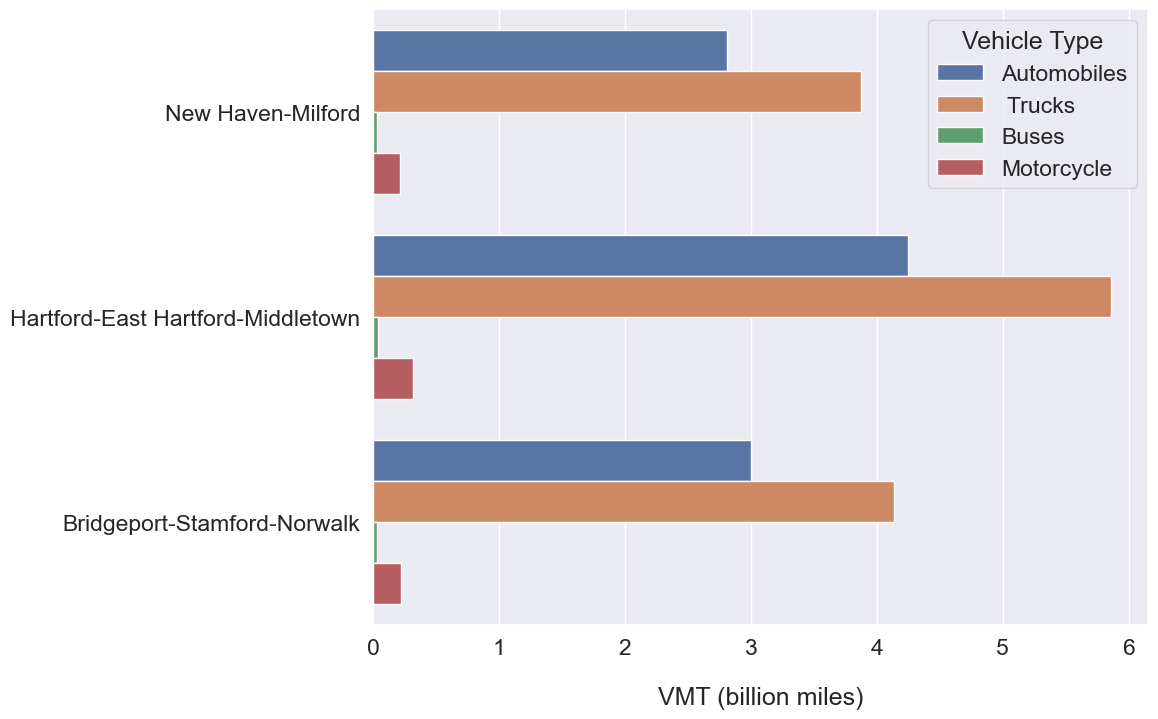

In [18]:
# Create a multiple bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)
sns.barplot(x='VMT(billion miles)', y='MSA', hue='Vehicle Type', data=df_msa_veh_vmt)

# Add labels and a legend
plt.xlabel('VMT (billion miles)',labelpad=20)
plt.gca().set_ylabel('')# delete ylabel
plt.legend(title='Vehicle Type')
plt.savefig('../../../figures/vehicle-type-number.png', dpi=600,bbox_inches='tight')

In [19]:
#this table comes from the LGGIT TOOL: community module
car_mpg = pd.DataFrame(np.array([[24.1, 18.5, 10.13, 50, 8.78], [32.4, 22.1, 12.96, 'NA', 10.21]]),
                   columns=['Passenger_car', 'Light_truck', 'Heavy_duty', 'Motorcycle', 'Emission_factor (kg CO2/gallon)'])
car_mpg.index = ['Gasoline', 'Diesel']

# Define a function to center-align the text
def center_align(val):
    return 'text-align: center'

# Apply the center-align style to the entire DataFrame
styled_car_mpg = car_mpg.style.applymap(center_align)

# Display the centered DataFrame
styled_car_mpg

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23080\1509200751.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_car_mpg = car_mpg.style.applymap(center_align)


,Passenger_car,Light_truck,Heavy_duty,Motorcycle,Emission_factor (kg CO2/gallon)
Gasoline,24.1,18.5,10.13,50,8.78
Diesel,32.4,22.1,12.96,NA,10.21


In [20]:
car_mpg.to_csv('../../../data/tidy/mpg.csv')

In [32]:
#Calculate the fuel consumption using existing vmt data
#Assumptions: passenger car represents automobile; light-trucks represents trucks; heavy-duty
#represents buses
car_mpg = pd.DataFrame(np.array([[24.1, 18.5, 10.13, 50, 8.78], [32.4, 22.1, 12.96, 'NA', 10.21]]),
                   columns=['Automobiles', 'Trucks', 'Buses', 'Motorcycle', 'Emission_factor (kg CO2/gallon)'])
car_mpg.index = ['gasoline', 'diesel']

# Define a function to center-align the text
def center_align(val):
    return 'text-align: center'

# Apply the center-align style to the entire DataFrame
styled_car_mpg = car_mpg.style.applymap(center_align)


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23080\2341391479.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_car_mpg = car_mpg.style.applymap(center_align)


In [33]:
# List of names to add to the new column
gasoline_mpg = [24.1, 18.5, 10.13, 50]
total_rows = 12

# Use a for loop to add names into a new column and repeat them
gasompg_column = []
for i in range(total_rows):
    gaso_mpg = gasoline_mpg[i % len(gasoline_mpg)]  # Use modulo to cycle through the names list
    gasompg_column.append(gaso_mpg)

df_msa_veh_vmt['Gasoline MPG (miles per gallon)'] = gasompg_column

# List of names to add to the new column
diesel_mpg = [32.4, 22.1, 12.96, 0]
total_rows = 12

# Use a for loop to add names into a new column and repeat them
diempg_column = []
for i in range(total_rows):
    dies_mpg = diesel_mpg[i % len(gasoline_mpg)]  # Use modulo to cycle through the names list
    diempg_column.append(dies_mpg)

df_msa_veh_vmt['Diesel MPG (miles per gallon)'] = diempg_column


df_msa_veh_vmt['CO2 Gasoline Emission Factor (kg CO2/gallon)'] = 8.78
df_msa_veh_vmt['CO2 Diesel Emission Factor (kg CO2/gallon)'] = 10.21

#obtain from the emission hub
emi_fac = pd.DataFrame(np.array([[8.78,0,0,0],[10.21,0,0,0],[0.0075, 0.0105, 0.0297, 0], [0.0067, 0.0064, 0.0083, 0],[0.0005,0.0009,0.0051,0],[0.001,0.0014,0.0048,0]]),
                   columns=['Automobiles', 'Trucks', 'Buses', 'Motorcycle'])
emi_fac.index = ['gasoline_CO2','diesel_CO2','gasoline_CH4', 'gasoline_N2O','diesel_CH4', 'diesel_N2O']

In [34]:
emi_fac = pd.DataFrame(np.array([[8.78, 8.78, 8.78, 8.78], [0.0075, 0.0105, 0.0297, 'NA'], [0.0067, 0.0064, 0.0083, 'NA'],[10.21, 10.21, 10.21, 'NA'], [0.0005, 0.0009, 0.0051, 'NA'], [0.001, 0.0014, 0.0048, 'NA']]),
                   columns=['Automobiles', 'Trucks', 'Buses', 'Motorcycle'])
emi_fac.index = ['Gasoline_CO2', 'Gasoline_CH4', 'Gasoline_N2O', 'Diesel_CO2','Diesel_CH4', 'Diesel_N2O']
emi_fac=emi_fac.transpose()
emi_fac.to_csv('../../../data/tidy/vehicle-fuel-emission-factor.csv')

In [35]:
emi_fac

,Gasoline_CO2,Gasoline_CH4,Gasoline_N2O,Diesel_CO2,Diesel_CH4,Diesel_N2O
Automobiles,8.78,0.0075,0.0067,10.21,0.0005,0.001
Trucks,8.78,0.0105,0.0064,10.21,0.0009,0.0014
Buses,8.78,0.0297,0.0083,10.21,0.0051,0.0048
Motorcycle,8.78,NA,NA,NA,NA,NA


In [37]:
# List of names to add to the new column
gasoline_ch4 = [0.0075,0.0105,0.0297,0.0]
total_rows = 12

# Use a for loop to add names into a new column and repeat them
gasoline_ch4_column = []
for i in range(total_rows):
    gasoline_ch4_emi = gasoline_ch4[i % len(gasoline_mpg)]  # Use modulo to cycle through the names list
    gasoline_ch4_column.append(gasoline_ch4_emi)

df_msa_veh_vmt['CH4 Gasoline Emission Factor (g/mile)'] = gasoline_ch4_column

# List of names to add to the new column
gasoline_n20 = [0.0067,0.0064,0.0083,0.0]
total_rows = 12

# Use a for loop to add names into a new column and repeat them
gasoline_n20_column = []
for i in range(total_rows):
    gasoline_n20_emi = gasoline_n20[i % len(gasoline_mpg)]  # Use modulo to cycle through the names list
    gasoline_n20_column.append(gasoline_n20_emi)

df_msa_veh_vmt['N2O Gasoline Emission Factor (g/mile)'] = gasoline_n20_column

# List of names to add to the new column
diesel_ch4 = [0.0005,0.0009,0.0051,0.0]
total_rows = 12

# Use a for loop to add names into a new column and repeat them
diesel_ch4_column = []
for i in range(total_rows):
    diesel_ch4_emi = diesel_ch4[i % len(diesel_ch4)]  # Use modulo to cycle through the names list
    diesel_ch4_column.append(diesel_ch4_emi)

df_msa_veh_vmt['CH4 Diesel Emission Factor (g/mile)'] = diesel_ch4_column

# List of names to add to the new column
diesel_n20 = [0.0010,0.0014,0.0048,0.0]
total_rows = 12

# Use a for loop to add names into a new column and repeat them
diesel_n20_column = []
for i in range(total_rows):
    diesel_n20_emi = diesel_n20[i % len(diesel_n20)]  # Use modulo to cycle through the names list
    diesel_n20_column.append(diesel_n20_emi)

df_msa_veh_vmt['N2O Diesel Emission Factor (g/mile)'] = diesel_n20_column

In [39]:
#assuming all the car use the gasoline as the fuel
#carbon dioxide emission calculation: VMT/Gasoline MPG*Emission factor
#CH4/N2O Calculation: VMT*emissionn factor/1000000
df_msa_veh_vmt['CO2 Emission from Gasoline (metric ton)']=df_msa_veh_vmt['VMT(billion miles)']*10**9/df_msa_veh_vmt['Gasoline MPG (miles per gallon)']*df_msa_veh_vmt['CO2 Gasoline Emission Factor (kg CO2/gallon)']/1000
df_msa_veh_vmt['CH4 Emission from Gasoline (metric ton)']=(df_msa_veh_vmt['VMT(billion miles)']*10**9*df_msa_veh_vmt['CH4 Gasoline Emission Factor (g/mile)']/1000000)*25
df_msa_veh_vmt['N2O Emission from Gasoline (metric ton)']=(df_msa_veh_vmt['VMT(billion miles)']*10**9*df_msa_veh_vmt['N2O Gasoline Emission Factor (g/mile)']/1000000)*298
df_msa_veh_vmt['GHG Emissions_Gasoline ( MMTCO2e)']=(df_msa_veh_vmt['CO2 Emission from Gasoline (metric ton)']+df_msa_veh_vmt['CH4 Emission from Gasoline (metric ton)']+df_msa_veh_vmt['N2O Emission from Gasoline (metric ton)'])/1000000

In [40]:
#calculation of diesel
df_msa_veh_vmt['CO2 Emission from Diesel (metric ton)']=df_msa_veh_vmt['VMT(billion miles)']*10**9/df_msa_veh_vmt['Diesel MPG (miles per gallon)']*df_msa_veh_vmt['CO2 Diesel Emission Factor (kg CO2/gallon)']/1000
df_msa_veh_vmt['CH4 Emission from Diesel (metric ton)']=(df_msa_veh_vmt['VMT(billion miles)']*10**9*df_msa_veh_vmt['CH4 Diesel Emission Factor (g/mile)']/1000000)*25
df_msa_veh_vmt['N2O Emission from Diesel (metric ton)']=(df_msa_veh_vmt['VMT(billion miles)']*10**9*df_msa_veh_vmt['N2O Diesel Emission Factor (g/mile)']/1000000)*298
df_msa_veh_vmt['GHG Emissions_Diesel ( MMTCO2e)']=(df_msa_veh_vmt['CO2 Emission from Diesel (metric ton)']+df_msa_veh_vmt['CH4 Emission from Diesel (metric ton)']+df_msa_veh_vmt['N2O Emission from Diesel (metric ton)'])/1000000

In [44]:
df_msa_veh_vmt.replace([np.inf, -np.inf], 0, inplace=True)#replace all the inf into zero

selected_columns = ['MSA', 'Vehicle Type', 'VMT(billion miles)','CO2 Emission from Gasoline (metric ton)', 'CH4 Emission from Gasoline (metric ton)',
                   'N2O Emission from Gasoline (metric ton)','CO2 Emission from Diesel (metric ton)','CH4 Emission from Diesel (metric ton)','N2O Emission from Diesel (metric ton)',
                   ]
new_df_msa_veh_vmt = df_msa_veh_vmt[selected_columns]

In [46]:
# Define the rows you want to sum
rows_to_sum_HM = [0, 1, 2, 3]  # Replace with the row indices you want to sum
rows_to_sum_HH = [4, 5, 6, 7]
rows_to_sum_BSN = [8, 9, 10, 11]

# Specify the column you want to sum
column_to_sum = 'GHG Emissions_Gasoline ( MMTCO2e)'

# Calculate the sum of the selected rows in the specified column
Total_GHG_GASO_NH = df_msa_veh_vmt.loc[rows_to_sum_HM, column_to_sum].sum()
Total_GHG_GASO_HH = df_msa_veh_vmt.loc[rows_to_sum_HH, column_to_sum].sum()
Total_GHG_GASO_BSN = df_msa_veh_vmt.loc[rows_to_sum_BSN, column_to_sum].sum()

In [47]:
# Specify the column you want to sum
column_to_sum = 'GHG Emissions_Diesel ( MMTCO2e)'

# Calculate the sum of the selected rows in the specified column
Total_GHG_DIEL_NH = df_msa_veh_vmt.loc[rows_to_sum_HM, column_to_sum].sum()
Total_GHG_DIEL_HH = df_msa_veh_vmt.loc[rows_to_sum_HH, column_to_sum].sum()
Total_GHG_DIEL_BSN = df_msa_veh_vmt.loc[rows_to_sum_BSN, column_to_sum].sum()

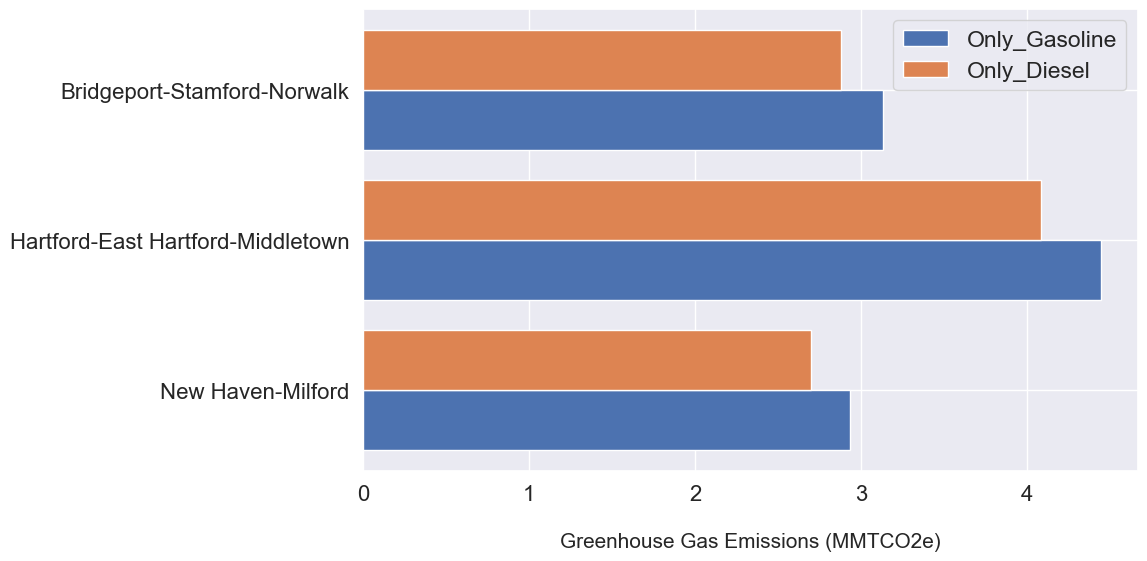

In [48]:
plt.figure(figsize=(10, 6))
X = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
Only_Gasoline = [Total_GHG_GASO_NH, Total_GHG_GASO_HH, Total_GHG_GASO_BSN]
Only_Diesel = [Total_GHG_DIEL_NH, Total_GHG_DIEL_HH, Total_GHG_DIEL_BSN]

Y_axis = np.arange(len(X))

plt.barh(Y_axis -0.2, Only_Gasoline, 0.4, label='Only_Gasoline')
plt.barh(Y_axis +0.2, Only_Diesel, 0.4, label='Only_Diesel')

plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)
plt.legend()
plt.show()


In [49]:
#calculate the emission per miles in gasoline
emission_miles_NM=Total_GHG_GASO_NH/New_haven_msa_vmt
emission_miles_HH=Total_GHG_GASO_HH/Hartford_msa_vmt
emission_miles_BSN=Total_GHG_DIEL_BSN/Bridgeport_msa_vmt

In [52]:
CO2_gaso = df_msa_veh_vmt.groupby('MSA')['CO2 Emission from Gasoline (metric ton)'].sum()
CH4_gaso = df_msa_veh_vmt.groupby('MSA')['CH4 Emission from Gasoline (metric ton)'].sum()
N2O_gaso =df_msa_veh_vmt.groupby('MSA')['N2O Emission from Gasoline (metric ton)'].sum()

CO2_diese = df_msa_veh_vmt.groupby('MSA')['CO2 Emission from Diesel (metric ton)'].sum()
CH4_diese = df_msa_veh_vmt.groupby('MSA')['CH4 Emission from Diesel (metric ton)'].sum()
N2O_diese =df_msa_veh_vmt.groupby('MSA')['N2O Emission from Diesel (metric ton)'].sum()